![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/multi_lingual_webinar/1_NLU_base_features_on_dataset_with_YAKE_Lemma_Stemm_classifiers_NER_.ipynb)

# 1. Install NLU 

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  pyspark==2.4.4  > /dev/null    
import nlu  

# Download dataset with major news about crypto currencies.
## We will use the 'title' column for our examples
https://www.kaggle.com/kashnitsky/news-about-major-cryptocurrencies-20132018-40k

![Crypto](http://ckl-it.de/wp-content/uploads/2021/02/crypto.jpeg )

In [ ]:
import pandas as pd 
import nlu
!wget http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv 
df = pd.read_csv('/content/small_btc.csv').title
df

--2021-02-17 14:18:25--  http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22244914 (21M) [text/csv]
Saving to: ‘small_btc.csv’

small_btc.csv       100%[===================>]  21.21M  5.76MB/s    in 3.8s    

2021-02-17 14:18:30 (5.54 MB/s) - ‘small_btc.csv’ saved [22244914/22244914]



0          Bitcoin Price Update: Will China Lead us Down?
1       Key Bitcoin Price Levels for Week 51 (15 – 22 ...
2       National Australia Bank, Citing Highly Flawed ...
3       Chinese Bitcoin Ban Driven by  Chinese Banking...
4                   Bitcoin Trade Update: Opened Position
                              ...                        
1995    Bitcoin Bill Pay Company Living Room of Satosh...
1996    NYDFS Extends BitLicense Bitcoin Regulation Co...
1997    Bitfinex Passes Stefan Thomas’s Proof Of Solve...
1998    Cryptocurrency Exchange Platform AlphaPoint Pa...
1999    Want to Buy And Sell Bitcoin Fast and Secure? ...
Name: title, Length: 2000, dtype: object

# Predict Emotion of News Article titles

In [ ]:
import nlu
# Predict sentiment on dataset with NLU sentiment model
emo_df = nlu.load('emotion').predict(df)
emo_df

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,emotion,title,text,sentence_embeddings,emotion_confidence,sentence
origin_index,,,,,,
0,fear,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,"[0.05829371139407158, -0.036904484033584595, -...",0.998173,Bitcoin Price Update: Will China Lead us Down?
1,joy,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[0.038088250905275345, -0.04514157399535179, -...",0.997696,Key Bitcoin Price Levels for Week 51 (15 – 22 ...
2,fear,"National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","[0.050343189388513565, -0.013036551885306835, ...",0.999998,"National Australia Bank, Citing Highly Flawed ..."
3,fear,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking...,"[0.055152829736471176, -0.05237917602062225, -...",0.999135,Chinese Bitcoin Ban Driven by Chinese Banking ...
4,joy,Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,"[0.059269748628139496, -0.05646341294050217, -...",0.998864,Bitcoin Trade Update: Opened Position
...,...,...,...,...,...,...
1996,fear,NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,"[0.0639236643910408, -0.05505230277776718, -0....",0.998281,NYDFS Extends BitLicense Bitcoin Regulation Co...
1997,fear,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,"[0.059178080409765244, -0.041498005390167236, ...",0.772052,Bitfinex Passes Stefan Thomas’s Proof Of Solve...
1998,joy,Cryptocurrency Exchange Platform AlphaPoint Pa...,Cryptocurrency Exchange Platform AlphaPoint Pa...,"[0.05369672179222107, -0.023480931296944618, -...",0.999348,Cryptocurrency Exchange Platform AlphaPoint Pa...


# Plot sentiment distribution

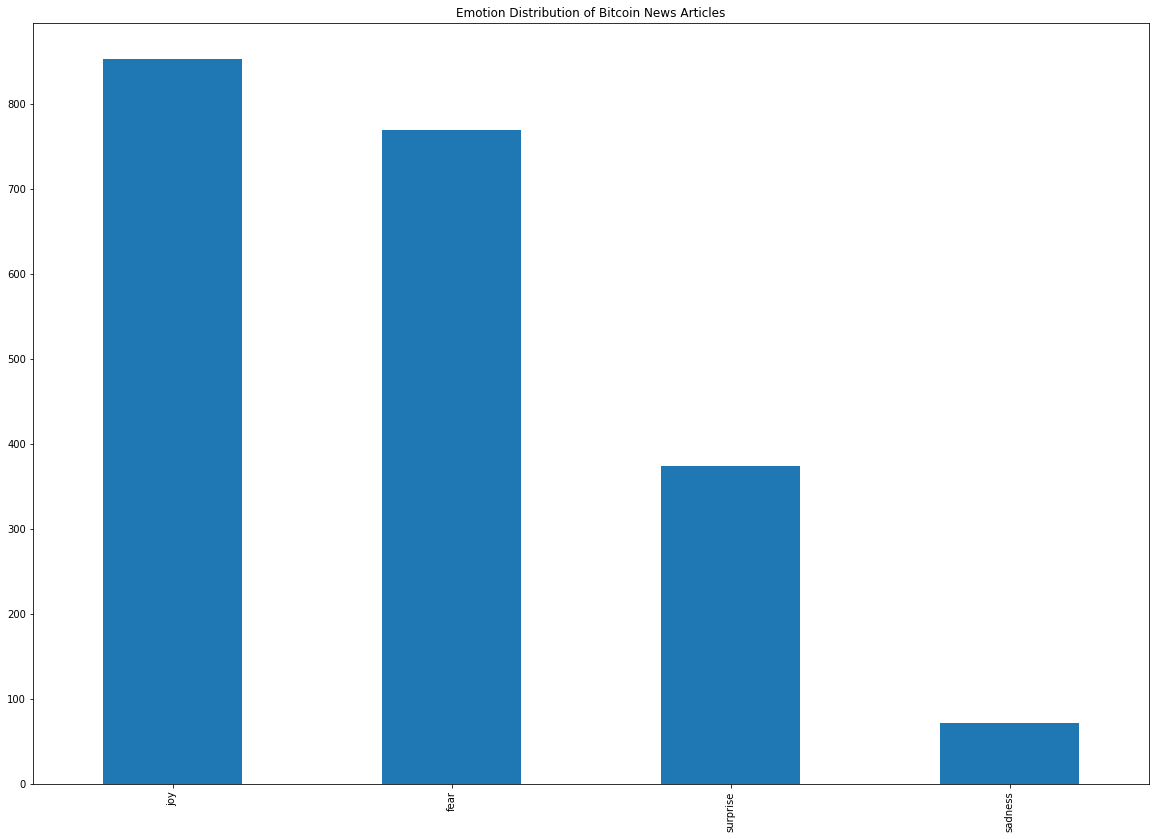

In [ ]:
emo_df.emotion.value_counts().plot.bar(figsize=(20,14), title = 'Emotion Distribution of Bitcoin News Articles')

# Predict keywords occuring in dataset with YAKE

In [31]:
key_df = nlu.load('yake').predict(df)
key_df

,keywords_classes,title,text,document,keywords_confidences
origin_index,,,,,
0,"[update, china, china lead]",Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,"[0.579886257648468, 0.579886257648468, 0.50663..."
1,"[price, levels, price levels]",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[0.579886257648468, 0.579886257648468, 0.50663..."
2,"[bubble, citing highly flawed, highly flawed d...","National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","[0.28654029965400696, 0.19553975760936737, 0.1..."
3,"[ban driven, banking crisis, bitcoin ban driven]",Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking ...,"[0.29364120960235596, 0.29364120960235596, 0.2..."
4,"[update, position, opened position]",Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,"[0.579886257648468, 0.26804494857788086, 0.184..."
...,...,...,...,...,...
1995,"[operations, resumes operations, satoshi resum...",Bitcoin Bill Pay Company Living Room of Satosh...,Bitcoin Bill Pay Company Living Room of Satosh...,Bitcoin Bill Pay Company Living Room of Satosh...,"[0.26804494857788086, 0.1840423047542572, 0.16..."
1996,"[period, comment period, regulation comment pe...",NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,"[0.26804494857788086, 0.1840423047542572, 0.16..."
1997,"[proof, audit, solvency audit]",Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,"[0.579886257648468, 0.26804494857788086, 0.184..."


# Plot keyword Distribution
You need to call `.explode()` on the keyword column and then get the count of each keyword

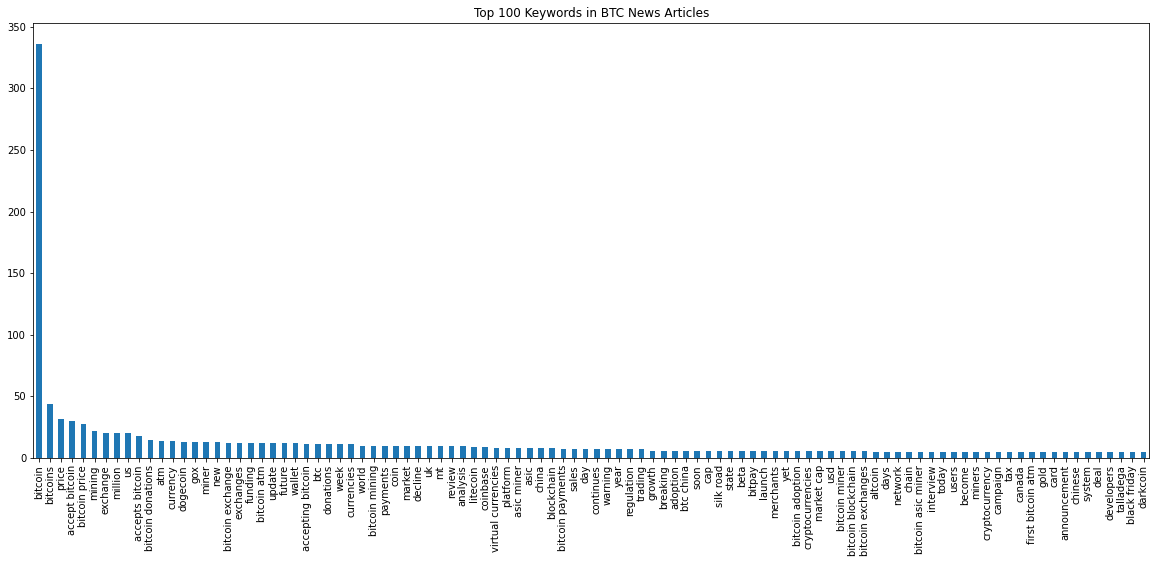

In [32]:
key_df.explode('keywords_classes').keywords_classes.value_counts()[0:100].plot.bar(title='Top 100 Keywords in BTC News Articles', figsize=(20,8))


# Stem Data with NLU
To reduce dimensionality of the data and yield better results with keyword extraction, we can apply the built in stemmer on our dataset. Especially to merge occurences of termns like `bitcoin` and `bitcoins`

Note, Lemmatizing and Normalizing could also applied for further dimension reduction, but they would noch fix the previously mentioned example

In [ ]:
stem_df = nlu.load('stem').predict(df, output_level = 'document')
stem_df['stem_string'] = stem_df.stem.str.join(' ')
stem_df

,title,text,stem,document,stem_string
origin_index,,,,,
0,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,"[bitcoin, price, updat, :, will, china, lead, ...",Bitcoin Price Update: Will China Lead us Down?,bitcoin price updat : will china lead u down ?
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[kei, bitcoin, price, level, for, week, 51, (,...",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,kei bitcoin price level for week 51 ( 15 – 22 ...
2,"National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","[nation, australia, bank, ,, cite, highli, fla...","National Australia Bank, Citing Highly Flawed ...","nation australia bank , cite highli flawe data..."
3,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking...,"[chines, bitcoin, ban, driven, by, chines, ban...",Chinese Bitcoin Ban Driven by Chinese Banking ...,chines bitcoin ban driven by chines bank crisi ?
4,Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,"[bitcoin, trade, updat, :, open, posit]",Bitcoin Trade Update: Opened Position,bitcoin trade updat : open posit
...,...,...,...,...,...
1995,Bitcoin Bill Pay Company Living Room of Satosh...,Bitcoin Bill Pay Company Living Room of Satosh...,"[bitcoin, bill, pai, compani, live, room, of, ...",Bitcoin Bill Pay Company Living Room of Satosh...,bitcoin bill pai compani live room of satoshi ...
1996,NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,"[nydf, extend, bitlicens, bitcoin, regul, comm...",NYDFS Extends BitLicense Bitcoin Regulation Co...,nydf extend bitlicens bitcoin regul comment pe...
1997,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,"[bitfinex, pass, stefan, thomas’, proof, of, s...",Bitfinex Passes Stefan Thomas’s Proof Of Solve...,bitfinex pass stefan thomas’ proof of solvenc ...


# Stem+YAKE
We can see `bitcoins` is not a keyword anymore and added to the `bitcoin` count including a lot of other occurences of Bitcoin in the dataset.

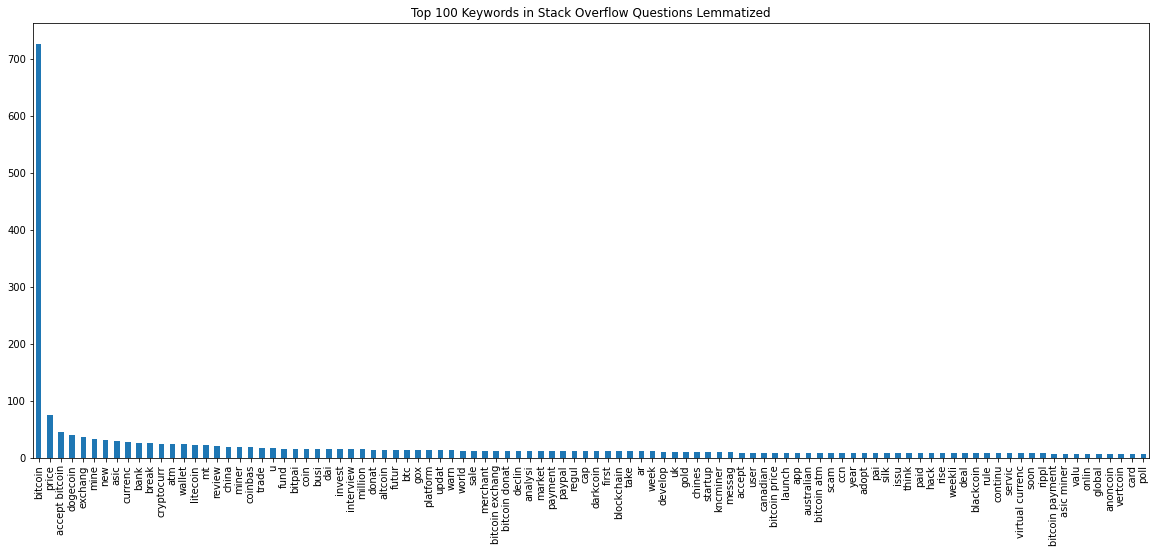

In [ ]:

stem_df = nlu.load('yake').predict(stem_df.stem_string)
stem_df.explode('keywords_classes').keywords_classes.value_counts()[0:100].plot.bar(title='Top 100 Keywords in Stack Overflow Questions Lemmatized', figsize=(20,8))

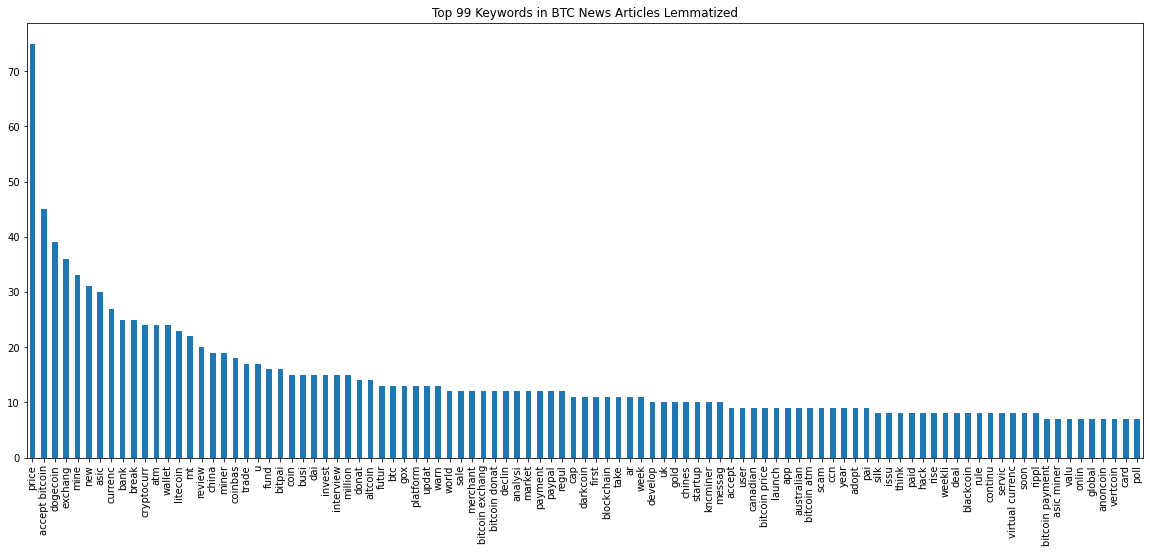

In [30]:
stem_df.explode('keywords_classes').keywords_classes.value_counts()[1:100].plot.bar(title='Top 99 Keywords in BTC News Articles Lemmatized', figsize=(20,8))


# Configure Yake to yield longer keywords
- `setNKeywords` to increase number of keywords extracted
- `setMinNGrams` Minimum N-grams a keyword should 
- `setMaxNGrams` Maximum N-grams a keyword should
- `setWindowSize`Window size for Co-Occurrence
- `setThreshold` Keyword Score threshold
- `setStopWords` The words to be filtered out. by default it's english stop words from Spark ML 

In [ ]:
import nlu

yake_pipe = nlu.load('yake')
yake_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['yake'] has settable params:
pipe['yake'].setMinNGrams(1)                         | Info: Minimum N-grams a keyword should have | Currently set to : 1
pipe['yake'].setMaxNGrams(3)                         | Info: Maximum N-grams a keyword should have | Currently set to : 3
pipe['yake'].setNKeywords(3)                         | Info: Number of Keywords to extract | Currently set to : 3
pipe['yake'].setWindowSize(3)                        | Info: Window size for Co-Occurrence | Currently set to : 3
pipe['yake'].setThreshold(-1.0)                      | Info: Keyword Score threshold | Currently set to : -1.0
pipe['yake'].setStopWords(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what

## Extract more keywords

In [ ]:
yake_pipe['yake'].setNKeywords(4)
key_df = yake_pipe.predict(df)
key_df

,keywords_classes,title,text,document,keywords_confidences
origin_index,,,,,
0,"[update, china, lead, china lead]",Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,"[0.579886257648468, 0.579886257648468, 0.57988..."
1,"[price, levels, week, price levels]",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[0.579886257648468, 0.579886257648468, 0.57988..."
2,"[bubble, highly flawed, citing highly flawed, ...","National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","[0.28654029965400696, 0.2879781723022461, 0.19..."
3,"[chinese, chinese, ban driven, banking crisis,...",Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking ...,"[0.3288547098636627, 0.3288547098636627, 0.293..."
4,"[update, opened, position, opened position]",Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,"[0.579886257648468, 0.579886257648468, 0.26804..."
...,...,...,...,...,...
1995,"[operations, satoshi resumes, resumes operatio...",Bitcoin Bill Pay Company Living Room of Satosh...,Bitcoin Bill Pay Company Living Room of Satosh...,Bitcoin Bill Pay Company Living Room of Satosh...,"[0.26804494857788086, 0.5066323280334473, 0.18..."
1996,"[nydfs, period, comment period, regulation com...",NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,"[0.45423248410224915, 0.26804494857788086, 0.1..."
1997,"[proof, solvency, audit, solvency audit]",Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,"[0.579886257648468, 0.579886257648468, 0.26804..."


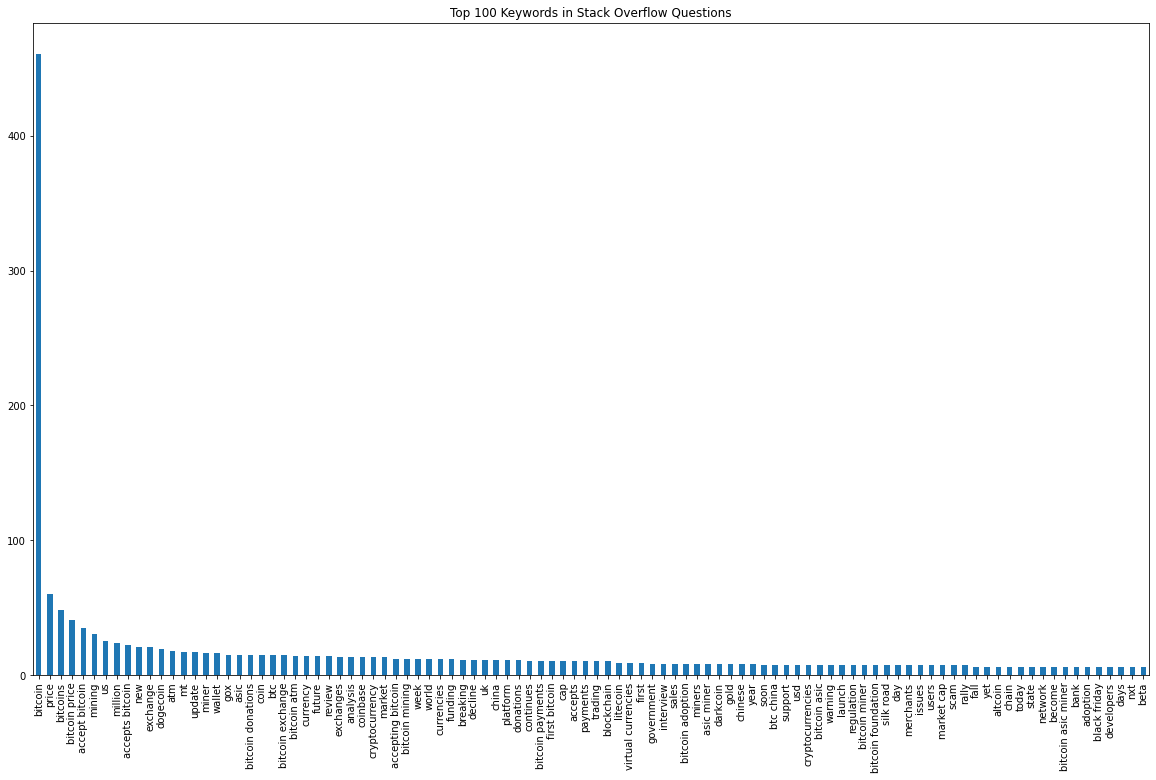

In [ ]:
key_df.explode('keywords_classes').keywords_classes.value_counts()[0:100].plot.bar(title='Top 100 Keywords in Stack Overflow Questions', figsize=(20,12))

## Configure NGrams considerd

In [ ]:
yake_pipe['yake'].setMinNGrams(2)
yake_pipe['yake'].setMaxNGrams(4)
key_df = yake_pipe.predict(df)
key_df

,keywords_classes,title,text,document,keywords_confidences
origin_index,,,,,
0,"[bitcoin price, china lead, lead us, china lea...",Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,"[0.7475647330284119, 0.37749895453453064, 0.56..."
1,"[key bitcoin, price levels, bitcoin price leve...",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[0.7475647330284119, 0.4625011086463928, 0.814..."
2,"[highly flawed, citing highly flawed, highly f...","National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","[0.23089197278022766, 0.1354624480009079, 0.13..."
3,"[ban driven, banking crisis, bitcoin ban drive...",Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking ...,"[0.27564486861228943, 0.24952805042266846, 0.3..."
4,"[bitcoin trade, trade update, opened position,...",Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,Bitcoin Trade Update: Opened Position,"[0.7475647330284119, 0.8779388070106506, 0.174..."
...,...,...,...,...,...
1995,"[resumes operations, company living room, sato...",Bitcoin Bill Pay Company Living Room of Satosh...,Bitcoin Bill Pay Company Living Room of Satosh...,Bitcoin Bill Pay Company Living Room of Satosh...,"[0.17407101392745972, 0.3086637258529663, 0.13..."
1996,"[comment period, bitcoin regulation comment, r...",NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,NYDFS Extends BitLicense Bitcoin Regulation Co...,"[0.17407101392745972, 0.3368493616580963, 0.13..."
1997,"[bitfinex passes, passes stefan, solvency audi...",Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,"[0.7475647330284119, 0.8779388070106506, 0.174..."


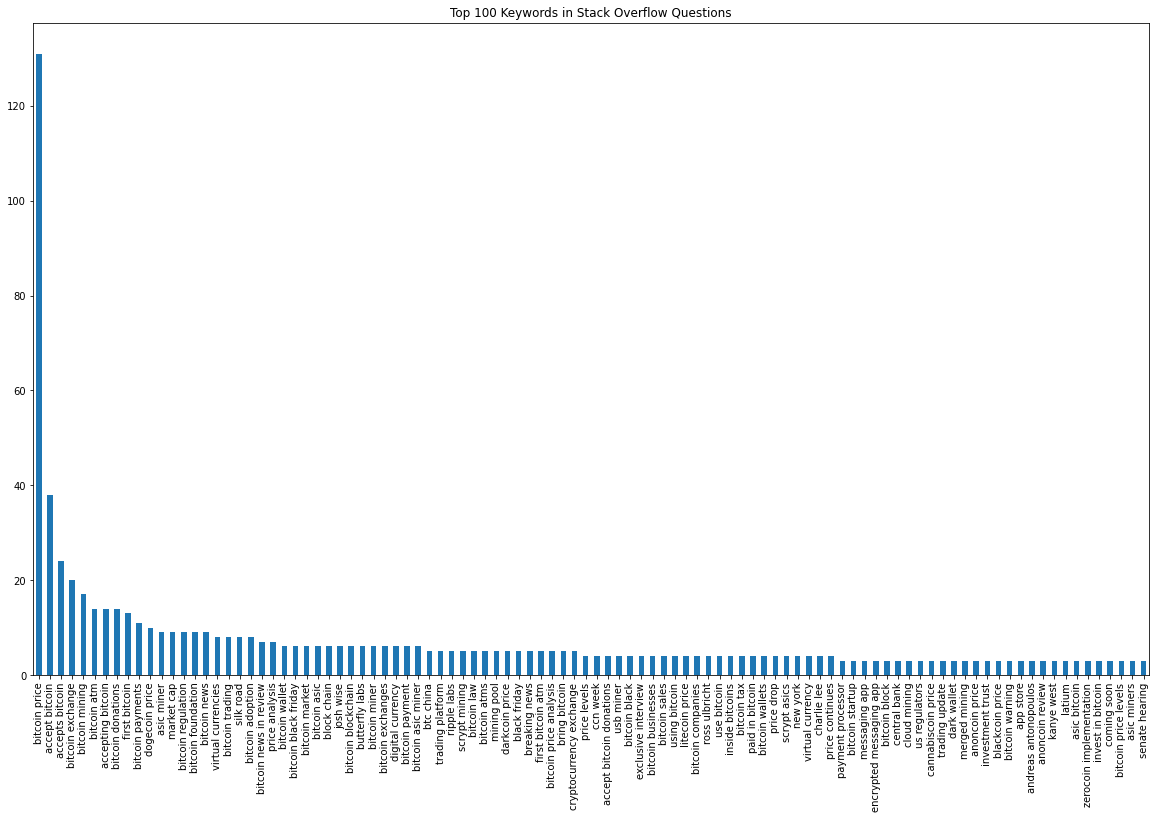

In [ ]:
key_df.explode('keywords_classes').keywords_classes.value_counts()[0:100].plot.bar(title='Top 100 Keywords in Stack Overflow Questions', figsize=(20,12))

# Extract **Named Entities**

In [22]:
ner_df = nlu.load('ner').predict(df, output_level='chunk')
ner_df

onto_recognize_entities_sm download started this may take some time.
Approx size to download 159 MB
[OK!]


,embeddings,title,text,ner_confidence,entities,entities_class
origin_index,,,,,,
0,"[[0.8403199911117554, 0.13267000019550323, -0....",Bitcoin Price Update: Will China Lead us Down?,Bitcoin Price Update: Will China Lead us Down?,"[0.9883000254631042, 0.9390000104904175, 0.683...",China,GPE
1,"[[-0.22009000182151794, 0.12280000001192093, 0...",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[0.9914000034332275, 0.35839998722076416, 0.97...",Week 51,DATE
1,"[[-0.22009000182151794, 0.12280000001192093, 0...",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,"[0.9914000034332275, 0.35839998722076416, 0.97...",15 – 22 Dec,DATE
2,"[[-0.003313800087198615, 0.3894599974155426, 0...","National Australia Bank, Citing Highly Flawed ...","National Australia Bank, Citing Highly Flawed ...","[0.9890000224113464, 0.5931000113487244, 0.880...",Australia,GPE
3,"[[0.4327400028705597, 0.3958199918270111, 0.58...",Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese Bitcoin Ban Driven by Chinese Banking...,"[0.9958000183105469, 0.9733999967575073, 0.883...",Chinese,NORP
...,...,...,...,...,...,...
1992,"[[0.48750001192092896, 0.4214000105857849, 0.0...",IBM to Unveil Bitcoin Blockchain Internet of T...,IBM to Unveil Bitcoin Blockchain Internet of T...,"[0.9929999709129333, 0.9976999759674072, 0.622...",2015,DATE
1994,"[[0.49737000465393066, 0.7104099988937378, 0.6...",Butterfly Labs Announces Two Two Week Delays… ...,Butterfly Labs Announces Two Two Week Delays… ...,"[0.9810000061988831, 0.5486999750137329, 0.347...",Two,CARDINAL
1994,"[[0.49737000465393066, 0.7104099988937378, 0.6...",Butterfly Labs Announces Two Two Week Delays… ...,Butterfly Labs Announces Two Two Week Delays… ...,"[0.9810000061988831, 0.5486999750137329, 0.347...",Week,DATE


# Plot Top 100 Named Entities in Crypto Dataset

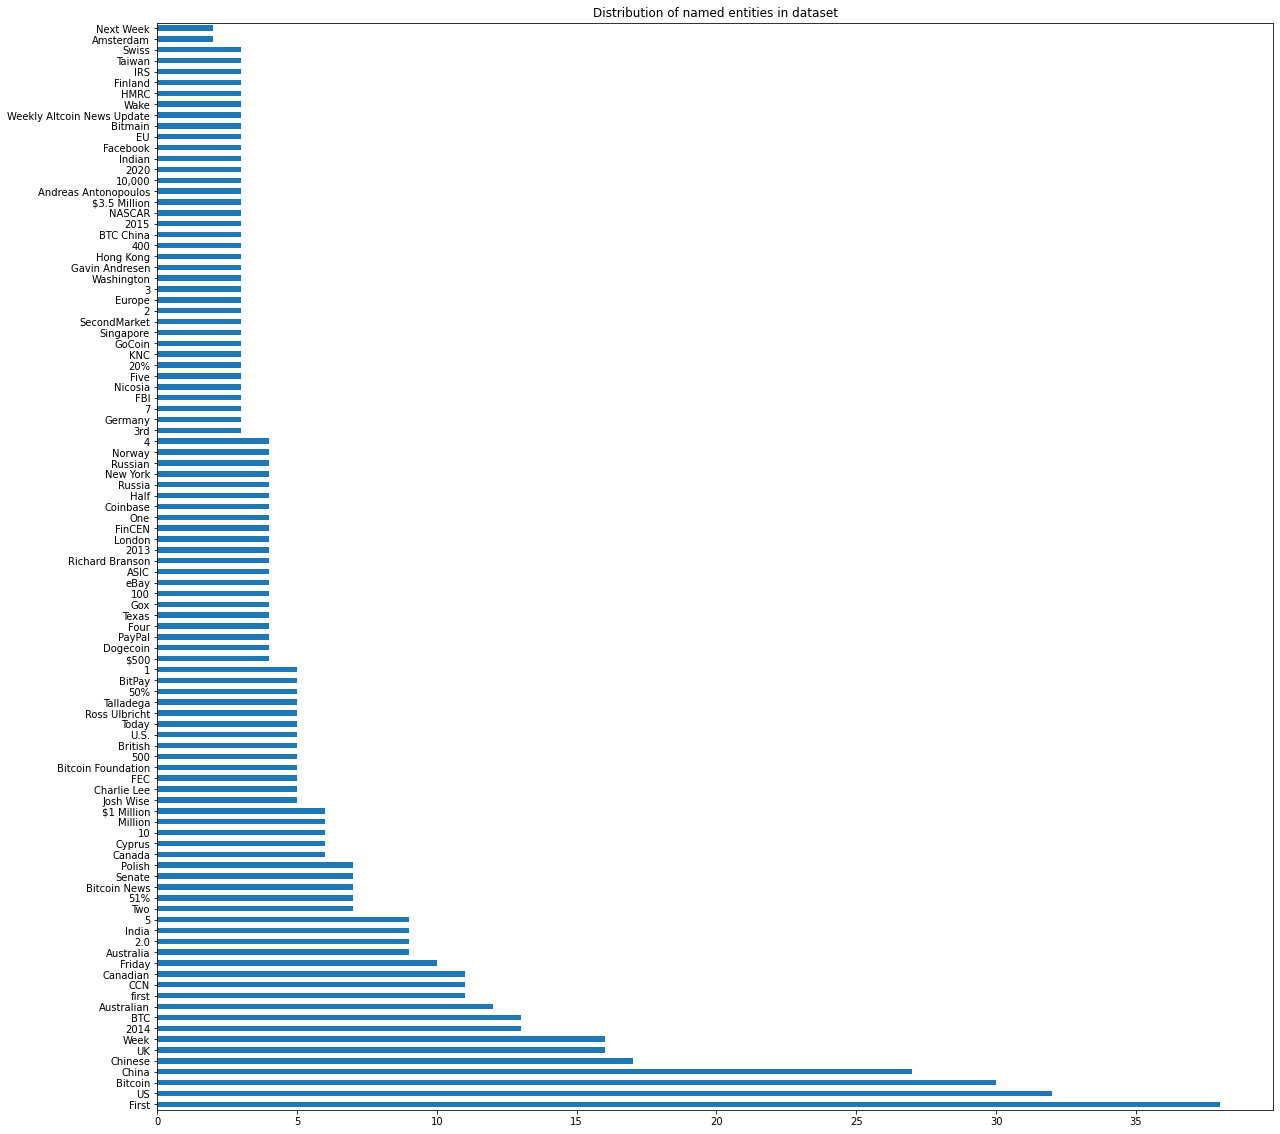

In [26]:
ner_df.entities.value_counts()[:100].plot.barh(title='Distribution of named entities in dataset', figsize=(20,20))

# There 1000+ models in 200+ languages waiting for you to be discoverd and put to good use!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models